<a href="https://colab.research.google.com/github/leaop/Graduation/blob/main/Exercicios_aula_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Entendendo a base de dados
* total_bill: o valor total da conta (incluindo a gorjeta).

* sex: o gênero do pagador da conta (masculino ou feminino).
* smoker: se o pagador da conta é fumante ou não.
* day: o dia da semana em que a conta foi paga (quinta-feira, sexta-feira, sábado ou domingo).
* time: se a refeição foi durante o almoço ou o jantar.
* size: o número de pessoas na mesa.
* tip: o valor da gorjeta, em dólares.

O objetivo deste conjunto de dados é explorar a relação entre o valor da gorjeta e as outras características da conta, como o valor total da conta, o gênero do pagador, se o pagador é fumante ou não, o dia da semana e a hora da refeição. Isso pode ser útil para entender como esses fatores influenciam a quantidade de gorjeta deixada pelos clientes do restaurante. 

Uma coisa interessante é que podemos utilizar esta base de dados tanto para um modelo supervisionado para tentar prever qualquer coluna com base nas demais colunas e, também podemos utilizar esta base de dados para treinamento de modelos não supervisionados sem precisar remover colunas na base de dados.

# 1 - Leia a base de dados gorjetas.csv

In [ ]:
import pandas as pd

df = pd.read_csv('gorjetas.csv')

# 2 - Faça uma análise exploratória da base da dados

exibir as colunas, informações estatísticas, tipo de dados das colunas, valores nulos...

In [ ]:
df.head()

,total_bill,sex,smoker,day,time,size,tip
0,16.99,Female,No,Sun,Dinner,NaN,1.01
1,10.34,Male,No,Sun,Dinner,3.0,1.66
2,21.01,Male,No,Sun,Dinner,3.0,3.50
3,23.68,Male,No,Sun,Dinner,2.0,3.31
4,24.59,Female,No,Sun,Dinner,4.0,3.61


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   sex         244 non-null    object 
 2   smoker      240 non-null    object 
 3   day         244 non-null    object 
 4   time        244 non-null    object 
 5   size        238 non-null    float64
 6   tip         244 non-null    float64
dtypes: float64(3), object(4)
memory usage: 13.5+ KB


In [ ]:
df.describe()

,total_bill,size,tip
count,244.000000,238.000000,244.000000
mean,19.785943,2.584034,2.998279
std,8.902412,0.958681,1.383638
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.000000,2.900000
75%,24.127500,3.000000,3.562500
max,50.810000,6.000000,10.000000


In [ ]:
df.describe(include='O')

,sex,smoker,day,time
count,244,240,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,147,87,176


In [ ]:
df.isna().sum()

total_bill    0
sex           0
smoker        4
day           0
time          0
size          6
tip           0
dtype: int64

In [ ]:
df.isna().sum() * 100 / len(df)

total_bill    0.000000
sex           0.000000
smoker        1.639344
day           0.000000
time          0.000000
size          2.459016
tip           0.000000
dtype: float64

# 3 - Trate os Valores Nulos

Substitua os valores nulos pela média, mediana ou moda (ou se achar conveniente, apague as colunas/linhas com valores nulos)

In [ ]:
df.smoker.value_counts()

No     147
Yes     93
Name: smoker, dtype: int64

In [ ]:
df.loc[df['smoker'].isna(),'smoker'] = 'No'

In [ ]:
df['size'].value_counts()

2.0    150
3.0     38
4.0     37
5.0      5
1.0      4
6.0      4
Name: size, dtype: int64

In [ ]:
df.loc[df['size'].isna(),'size'] = 2

In [ ]:
df.isna().sum()

total_bill    0
sex           0
smoker        0
day           0
time          0
size          0
tip           0
dtype: int64

# 3.1 - Tratar Valores textuais

In [ ]:
for col in df.describe(include='O').columns:
    valores_unicos = df[col].unique()
    print(f'{col} - valores existentes: {valores_unicos}\n')

sex - valores existentes: ['Female' 'Male']

smoker - valores existentes: ['No' 'Yes']

day - valores existentes: ['Sun' 'Sat' 'Thur' 'Fri']

time - valores existentes: ['Dinner' 'Lunch']



In [ ]:
df.loc[df['sex'] == 'Female', 'sex'] = 0
df.loc[df['sex'] == 'Male', 'sex'] = 1
df.loc[df['smoker'] == 'No', 'smoker'] = 0
df.loc[df['smoker'] == 'Yes', 'smoker'] = 1
df.loc[df['day'] == 'Sun', 'day'] = 0
df.loc[df['day'] == 'Sat', 'day'] = 1
df.loc[df['day'] == 'Thur', 'day'] = 2
df.loc[df['day'] == 'Fri', 'day'] = 3
df.loc[df['time'] == 'Dinner', 'time'] = 0
df.loc[df['time'] == 'Lunch', 'time'] = 1

In [ ]:
# Converter o tipo de dados das colunas de object para int
for col in df.describe(include='O').columns:
    df[col] = df[col].astype(int)

# 4 - Separe os dados em X e y

In [ ]:
X = df[df.columns[:-1]]
y = df[['tip']]

# 5 - Normalize os dados de X e y

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler_features =  MinMaxScaler()
scaler_features.fit(X)
X = scaler_features.transform(X)

scaler_target =  MinMaxScaler()
scaler_target.fit(y)
y = scaler_target.transform(y)

# 6 - Separe X e y em treinamento e teste com 20% para teste.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7 - Defina e treine um algoritmo capaz de prever qual o valor da gorjeta
Pode qualquer algoritmo que souber

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, InputLayer

In [ ]:
# Criamos uma instância do modelo de rede neural
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='linear'))

# compila o modelo
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

# treina o modelo
model.fit(X_train, y_train, epochs=200, batch_size=10, verbose = 0)

# 8 - Crie um gráfico comparando os valores reais e preditos de teste.

In [ ]:
from sklearn.metrics import mean_squared_error

predict = model.predict(X_test)

# Desnormaliza o predict na variável predict_desnormalizado
predict_desnormalizado = scaler_target.inverse_transform(predict)

# Desnormaliza o y_test na variável y_desnormalizado
y_test_desnormalizado = scaler_target.inverse_transform(y_test)

# Calcula o mse com a biblioteca do sklearn
mse = mean_squared_error(y_test_desnormalizado, predict_desnormalizado)
print("Mean squared error: ", mse)

2/2 [==============================] - 0s 2ms/step
Mean squared error:  1.5530110754226538


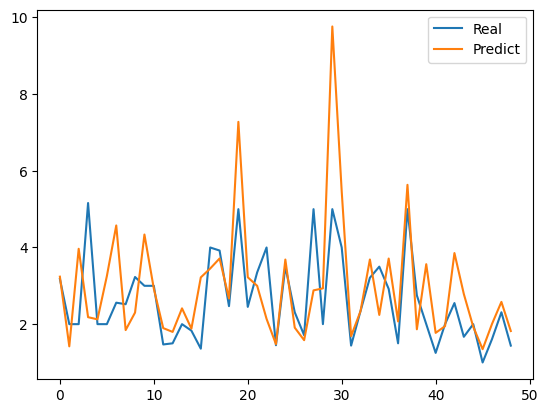

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(range(0,len(y_test_desnormalizado)), y_test_desnormalizado, label = 'Real')
plt.plot(range(0,len(predict_desnormalizado)), predict_desnormalizado, label = 'Predict')
plt.legend()
plt.show()

# 9 - Utilize os valores de todas as colunas para aplicar em um algoritmo de clusterização (algoritmo não supervisionado)

In [ ]:
from sklearn.cluster import KMeans

X = df.values

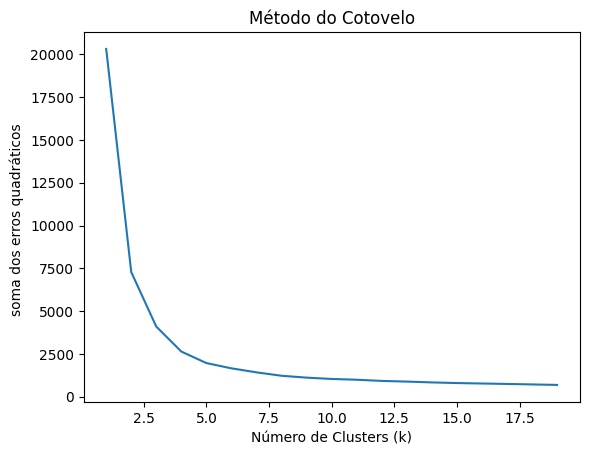

In [ ]:
from IPython.display import clear_output 

# Defina o intervalo de valores k
k_range = range(1, 20)

# Execute o algoritmo de clustering para cada valor k e armazene a soma dos erros quadráticos em uma lista
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)
# Limpa as mensagens de saída
clear_output(wait=True)

# Trace a curva de cotovelo
plt.plot(k_range, sse)
plt.xlabel('Número de Clusters (k)')
plt.ylabel('soma dos erros quadráticos ')
plt.title('Método do Cotovelo')
plt.show()

In [ ]:
# Cria o modelo KMeans com 3 clusters
kmeans = KMeans(n_clusters=4, random_state=0)

# Aplica o modelo aos dados
kmeans.fit(X)

# Obtém os rótulos dos clusters para cada amostra
labels = kmeans.labels_

c:\Users\arthu\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 10 - Faça ao menos 3 análises dos clusters encontrados.

In [ ]:
df.head(1)

,total_bill,sex,smoker,day,time,size,tip
0,16.99,0,0,0,0,2.0,1.01


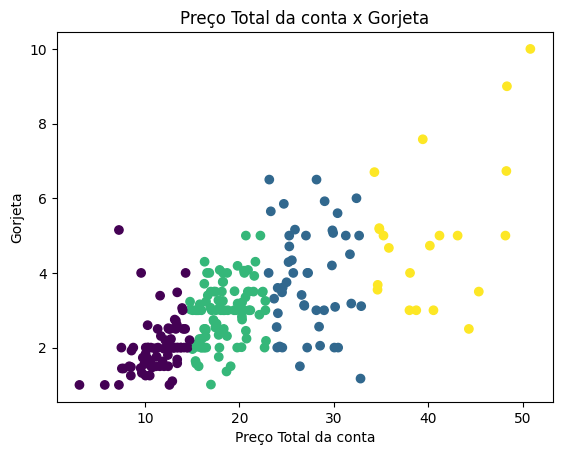

In [ ]:
plt.scatter(df['total_bill'], df['tip'],c=labels)
plt.xlabel('Preço Total da conta')
plt.ylabel('Gorjeta')
plt.title('Preço Total da conta x Gorjeta')
plt.show()

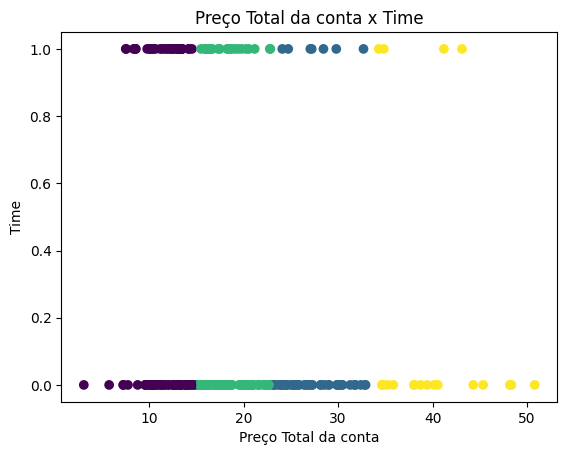

In [ ]:
plt.scatter(df['total_bill'], df['time'],c=labels)
plt.xlabel('Preço Total da conta')
plt.ylabel('Time')
plt.title('Preço Total da conta x Time')
plt.show()

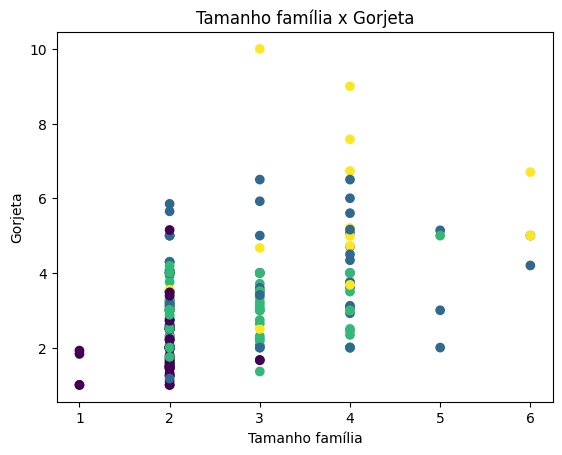

In [ ]:
plt.scatter(df['size'], df['tip'],c=labels)
plt.xlabel('Tamanho família')
plt.ylabel('Gorjeta')
plt.title('Tamanho família x Gorjeta')
plt.show()